# Data Preparation and Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

## Data Reading

In [2]:
df_raw = pd.read_csv("data/funda-rotterdam-11-18-2024.csv")

In [3]:
df_raw.head()

,blikvanger.enabled,object_type_specifications.appartment.type,publish_date,location.lat,location.lon,floor_area,plot_area,exterior_space.type,exterior_space.garden_orientation,number_of_rooms,...,accessibility,object_type_specifications.house.type,object_type_specifications.house.orientation,exterior_space.garden_size,garage.total_capacity,blikvanger.text,project.url,offering_type,object_type,address.province
0,False,with_external_access,2024-11-14T09:50:35.2200000,52.035892,4.318783,[77],[0],['balcony'],[],4.0,...,"['lift', 'single_storey']",NaN,NaN,NaN,NaN,NaN,NaN,['buy'],apartment,Zuid-Holland
1,False,NaN,2024-11-14T09:39:55.1700000,51.937077,4.564404,[128],[155],['garden'],"['north', 'west']",5.0,...,[],single_family,terraced,46.0,NaN,NaN,NaN,['buy'],house,Zuid-Holland
2,False,NaN,2024-11-14T00:00:02.3430000,52.013275,5.096314,[168],[420],['garden'],[],6.0,...,['accessible_for_the_elderly'],bungalow,detached,NaN,1.0,NaN,NaN,['buy'],house,Utrecht
3,True,NaN,2024-11-13T20:30:01.7370000,52.014400,5.094018,[107],[107],['garden'],['west'],4.0,...,[],single_family,terraced,44.0,NaN,"Eengezinswoning, royale woon-/eetkamer, open k...",NaN,['buy'],house,Utrecht
4,False,NaN,2024-11-13T20:15:01.8030000,51.900501,4.680570,[133],[127],['garden'],[],5.0,...,[],single_family,terraced,NaN,NaN,NaN,NaN,['buy'],house,Zuid-Holland


In [4]:
df_raw.shape

(4554, 33)

## Standardize Column Names

In [5]:
df_raw.columns

Index(['blikvanger.enabled', 'object_type_specifications.appartment.type',
       'publish_date', 'location.lat', 'location.lon', 'floor_area',
       'plot_area', 'exterior_space.type', 'exterior_space.garden_orientation',
       'number_of_rooms', 'number_of_bedrooms', 'address.municipality',
       'address.neighbourhood', 'address.wijk', 'address.street_name',
       'price.selling_price', 'price.selling_price_condition',
       'construction_type', 'construction_period', 'surrounding',
       'garage.type', 'energy_label', 'amenities', 'accessibility',
       'object_type_specifications.house.type',
       'object_type_specifications.house.orientation',
       'exterior_space.garden_size', 'garage.total_capacity',
       'blikvanger.text', 'project.url', 'offering_type', 'object_type',
       'address.province'],
      dtype='object')

Two changes are made. The period `.` is replaced by `_` such that we can make use of attribute-style access to column names, and the term `blikvanger` is replaced by its English translation, which is `eyecatcher`:

In [6]:
df_raw.columns = (
    df_raw.columns
    .str.replace(".", "_")
    .str.replace("blikvanger", "eyecatcher")
)

## Data Types

In [7]:
df_raw.dtypes

eyecatcher_enabled                                 bool
object_type_specifications_appartment_type       object
publish_date                                     object
location_lat                                    float64
location_lon                                    float64
floor_area                                       object
plot_area                                        object
exterior_space_type                              object
exterior_space_garden_orientation                object
number_of_rooms                                 float64
number_of_bedrooms                              float64
address_municipality                             object
address_neighbourhood                            object
address_wijk                                     object
address_street_name                              object
price_selling_price                              object
price_selling_price_condition                    object
construction_type                               

We have a lot of columns of type `object`. Let's take a look at their values.

In [8]:
df_raw.select_dtypes(include="object")

,object_type_specifications_appartment_type,publish_date,floor_area,plot_area,exterior_space_type,exterior_space_garden_orientation,address_municipality,address_neighbourhood,address_wijk,address_street_name,...,energy_label,amenities,accessibility,object_type_specifications_house_type,object_type_specifications_house_orientation,eyecatcher_text,project_url,offering_type,object_type,address_province
0,with_external_access,2024-11-14T09:50:35.2200000,[77],[0],['balcony'],[],Rijswijk,Artiestenbuurt,Wijk 06,Buziaulaan,...,D,[],"['lift', 'single_storey']",NaN,NaN,NaN,NaN,['buy'],apartment,Zuid-Holland
1,NaN,2024-11-14T09:39:55.1700000,[128],[155],['garden'],"['north', 'west']",Capelle aan den IJssel,Molenbuurt,Schenkel,Beltmolen,...,A,"['central_heating_boiler', 'renewable_energy']",[],single_family,terraced,NaN,NaN,['buy'],house,Zuid-Holland
2,NaN,2024-11-14T00:00:02.3430000,[168],[420],['garden'],[],Nieuwegein,Graven en Gravinnen,Fokkesteeg,Gravin Adelheidlaan,...,A,"['bathtub', 'renewable_energy']",['accessible_for_the_elderly'],bungalow,detached,NaN,NaN,['buy'],house,Utrecht
3,NaN,2024-11-13T20:30:01.7370000,[107],[107],['garden'],['west'],Nieuwegein,Graven en Gravinnen,Fokkesteeg,Graaf Woldemarlaan,...,A,"['bathtub', 'renewable_energy']",[],single_family,terraced,"Eengezinswoning, royale woon-/eetkamer, open k...",NaN,['buy'],house,Utrecht
4,NaN,2024-11-13T20:15:01.8030000,[133],[127],['garden'],[],Krimpenerwaard,Lekkerkerk-Oost,Wijk 00 Lekkerkerk,Berlagestraat,...,C,"['bathtub', 'central_heating_boiler']",[],single_family,terraced,NaN,NaN,['buy'],house,Zuid-Holland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4549,flat_with_porch,2024-11-17T15:00:02.1900000,[80],[0],[],[],Den Haag,"Venen, Oorden en Raden",Wijk 33 Bouwlust en Vrederust,A7-8,...,unknown,[],['single_storey'],NaN,NaN,NaN,/detail/koop/den-haag/appartement-a7-8-0-ong/4...,['buy'],apartment,Zuid-Holland
4550,flat_with_porch,2024-11-17T15:00:02.1900000,[80],[0],[],[],Den Haag,"Venen, Oorden en Raden",Wijk 33 Bouwlust en Vrederust,A7-8,...,unknown,[],['single_storey'],NaN,NaN,NaN,/detail/koop/den-haag/appartement-a7-8-0-ong/4...,['buy'],apartment,Zuid-Holland
4551,NaN,2024-10-08T00:00:03.7070000,[134],[320],['garden'],[],Zaltbommel,Zaltbommel Vergt en omgeving,Wijk 00 Zaltbommel,Vergtweg,...,D,['central_heating_boiler'],[],single_family,corner,NaN,NaN,['buy'],house,Gelderland
4552,upper_floor,2023-10-17T15:00:02.4270000,[118],[0],[],[],Papendrecht,Het Eiland,Westpolder,Bouwnummer 25,...,unknown,[],['single_storey'],NaN,NaN,NaN,/detail/koop/papendrecht/appartement-bouwnumme...,['buy'],apartment,Zuid-Holland


Here is what we'll do per `object` column:


| Column Name                                    | Action                                                                                                |
|------------------------------------------------|-------------------------------------------------------------------------------------------------------|
| `object_type_specifications_appartment_type`   | Fill `NaN` with `'not_applicable'`, convert to `string`.                                              |
| `publish_date`                                 | Convert to `datetime` format, calculate feature `days_published`                                      |
| `floor_area`                                   | Extract numeric values from strings (regex), convert to `integer`.                                    |
| `plot_area`                                    | Extract numeric values from strings (regex), convert to `integer`.                                    |
| `exterior_space_type`                          | Apply one-hot encoding.                                                                               |
| `exterior_space_garden_orientation`            | Apply one-hot encoding.                                                                               |
| `address_municipality`                         | Convert to `string`.                                                                                  |
| `address_neighbourhood`                        | Drop due to too high cardinality                                                                      |
| `address_wijk`                                 | Drop due to too high cardinality                                                                      |
| `address_street_name`                          | Drop due to too high cardinality                                                                      |
| `price_selling_price`                          | Extract numeric values from strings (regex), convert to `integer`. Note, this is our target variable. |
| `price_selling_price_condition`                | Convert to `string`                                                                                   |
| `construction_type`                            | Convert to `string`.                                                                                  |
| `construction_period`                          | Convert to `string`.                                                                                  |
| `surrounding`                                  | Apply one-hot encoding.                                                                               |
| `garage_type`                                  | Apply one-hot encoding.                                                                               |
| `energy_label`                                 | Convert to `string`.                                                                                  |
| `amenities`                                    | Apply one-hot encoding.                                                                               |
| `accessibility`                                | Apply one-hot encoding.                                                                               |
| `object_type_specifications_house_type`        | Fill `NaN` with `'not_available'`, convert to `string`.                                               |
| `object_type_specifications_house_orientation` | Fill `NaN` with `'not_available'`, convert to `string`.                                               |
| `eyecatcher_text`                              | Drop                                                                                                  |
| `project_url`                                  | Drop                                                                                                  |
| `offering_type`                                | Drop                                                                                                  |
| `object_type`                                  | Convert to `string`.                                                                                  |
| `address_province`                             | Drop                                                                                                  |


Besides the `object` columns, we have numeric, `float64` columns. Let's look at them and decide what to do:

In [9]:
df_raw.select_dtypes(include="number")

,location_lat,location_lon,number_of_rooms,number_of_bedrooms,exterior_space_garden_size,garage_total_capacity
0,52.035892,4.318783,4.0,3.0,NaN,NaN
1,51.937077,4.564404,5.0,4.0,46.0,NaN
2,52.013275,5.096314,6.0,4.0,NaN,1.0
3,52.014400,5.094018,4.0,3.0,44.0,NaN
4,51.900501,4.680570,5.0,4.0,NaN,NaN
...,...,...,...,...,...,...
4549,52.040726,4.248228,3.0,2.0,NaN,NaN
4550,52.040726,4.248228,3.0,2.0,NaN,NaN
4551,51.806423,5.249907,5.0,4.0,NaN,1.0
4552,51.822571,4.680316,4.0,3.0,NaN,NaN


Here's how we'll deal with them:

| Column Name                    | Action                                                                           |
|--------------------------------|----------------------------------------------------------------------------------|
| `location_lat`                 | Keep as-is                                                                       |
| `location_lon`                 | Keep as-s                                                                        |
| `number_of_rooms`              | Convert to `string` to deal with as categorical                                  |
| `number_of_bedrooms`           | Convert to `string` to deal with as categorical                                  |
| `exterior_space_garden_size`   | Fill `NaN` with `0` (no garage), convert to `string` to deal with as categorical |
| `garage_total_capacity`        | Fill `NaN` with `0` (no garage), convert to `string` to deal with as categorical |


## Missing Values

Let's first check the percentage of missing values per column:

In [10]:
df_raw.isna().mean().sort_values(ascending=False)

project_url                                     0.864954
garage_total_capacity                           0.851998
eyecatcher_text                                 0.751427
exterior_space_garden_size                      0.548090
object_type_specifications_appartment_type      0.542600
object_type_specifications_house_orientation    0.457400
object_type_specifications_house_type           0.457400
eyecatcher_enabled                              0.000000
publish_date                                    0.000000
number_of_rooms                                 0.000000
number_of_bedrooms                              0.000000
location_lat                                    0.000000
location_lon                                    0.000000
floor_area                                      0.000000
plot_area                                       0.000000
exterior_space_type                             0.000000
exterior_space_garden_orientation               0.000000
price_selling_price_condition  

Let's take a look at the columns with missing values:

In [11]:
df_raw[df_raw.columns[df_raw.isna().any()]]

,object_type_specifications_appartment_type,object_type_specifications_house_type,object_type_specifications_house_orientation,exterior_space_garden_size,garage_total_capacity,eyecatcher_text,project_url
0,with_external_access,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,single_family,terraced,46.0,NaN,NaN,NaN
2,NaN,bungalow,detached,NaN,1.0,NaN,NaN
3,NaN,single_family,terraced,44.0,NaN,"Eengezinswoning, royale woon-/eetkamer, open k...",NaN
4,NaN,single_family,terraced,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4549,flat_with_porch,NaN,NaN,NaN,NaN,NaN,/detail/koop/den-haag/appartement-a7-8-0-ong/4...
4550,flat_with_porch,NaN,NaN,NaN,NaN,NaN,/detail/koop/den-haag/appartement-a7-8-0-ong/4...
4551,NaN,single_family,corner,NaN,1.0,NaN,NaN
4552,upper_floor,NaN,NaN,NaN,NaN,NaN,/detail/koop/papendrecht/appartement-bouwnumme...


Some of the columns have missing values, because they are conditional. For example, `garage_total_capacity` will be NaN in case the house does not have a garage to begin with. In these cases, we will set NaNs to 0 if it's a numerical colum (e.g. `garage_total_capacity`) or to `not_available` if it's a categorical column (e.g. `object_type_specifications_appartment_type`). This takes care of the missing values in:
- `garage_total_capacity`
- `exterior_space_garden_size`
- `object_type_specifications_appartment_type`
- `object_type_specifications_house_type`
- `object_type_specifications_house_orientation`

Some of the columns with missing values will be dropped:
- `project_url`
- `eyecatcher_text`

## Data Preparation and Cleaning: putting it all together

All data preparation and cleaning steps are combined into one function `prepare_df`, with a number of helper functions.

In [12]:
def list_to_ohe(df, column):
    '''Converts a column with list-like string values into one-hot encoded columns.'''
    try:
        # Parse string as list and create one-hot encoded columns
        return (
            df
            .assign(**{f"{column}_{v}": df[column].apply(ast.literal_eval).apply(lambda x: v in x) for v in set(df[column].apply(ast.literal_eval).sum())})
            .drop(columns=column)  # Drop the original column after encoding
        )
    except ValueError:
        # Fallback if values are not in stringified list format
        return (
            df
            .assign(**{f"{column}_{v}": df[column].apply(lambda x: v in x) for v in set(df[column].sum())})
            .drop(columns=column)
        )

def list_to_ohe_multiple(df, columns):
    '''Applies one-hot encoding to multiple columns with list-like values.'''
    for column in columns:
        df = list_to_ohe(df, column)  # Update DataFrame with each column's one-hot encoding
    return df

def log1p_transform(df, columns):
    '''Applies a log(1+x) transformation to specified numeric columns.'''
    if not columns:
        return df  # Return original DataFrame if no columns specified
    return df.assign(**{c: np.log1p(df[c]) for c in columns})  # Apply log1p transformation

def prepare_df(df_raw, log1p_columns=None):
    '''Prepares the raw DataFrame for sklearn.'''
    return (
        df_raw
        # Clean columns and transform to the right data types
        .assign(
            object_type_specifications_appartment_type=df_raw.object_type_specifications_appartment_type.fillna("not_applicable").astype("string"),
            object_type_specifications_house_type=df_raw.object_type_specifications_house_type.fillna("not_applicable").astype("string"),
            object_type_specifications_house_orientation=df_raw.object_type_specifications_house_type.fillna("not_applicable").astype("string"),
            exterior_space_garden_size=pd.to_numeric(df_raw.exterior_space_garden_size.fillna(0), downcast="integer"),
            publish_date=pd.to_datetime(df_raw.publish_date, format="mixed"),
            floor_area=pd.to_numeric(df_raw.floor_area.str.extract(r"\[(\d+)\]")[0], downcast="integer"),
            plot_area=pd.to_numeric(df_raw.plot_area.str.extract(r"\[(\d+)\]")[0], downcast="integer"),
            garage_total_capacity=df_raw.garage_total_capacity.fillna(0).astype("string"),
            price_selling_price=pd.to_numeric(df_raw.price_selling_price.str.extract(r"\[(\d+)\]")[0], downcast="integer"),
        )
        # filter valid prices
        .query('''price_selling_price > 1''')
        # Apply log1p transformation to numeric columns specified in log1p_columns
        .pipe(log1p_transform, columns=log1p_columns)
        # Apply one-hot encoding to list-like columns
        .pipe(list_to_ohe_multiple, columns=["exterior_space_type", "exterior_space_garden_orientation", "surrounding", "garage_type", "amenities", "accessibility"])
        # Set final data types for specific columns
        .astype({
            "number_of_rooms": "string",
            "number_of_bedrooms": "string",
            "address_municipality": "string",
            "price_selling_price_condition": "string",
            "construction_type": "string",
            "construction_period": "string",
            "object_type": "string",
            "energy_label": "string",
        })
        # Drop unused columns
        .drop(
            columns=[
                "publish_date",
                "address_neighbourhood", 
                "address_wijk", 
                "address_province", 
                "address_street_name",
                "eyecatcher_text",
                "project_url",
                "offering_type",
            ]
        )
    )


In [13]:
df = prepare_df(df_raw)

# Setting up validation framework

Let's divide the variables into categorical and numerical:

In [14]:
numerical = df.select_dtypes(include="number").columns.to_list()
categorical = df.select_dtypes(include=["string", bool]).columns.to_list()

Now let's split the data into train, validation, and test sets.

In [15]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [16]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = df_train.price_selling_price.values
y_val = df_val.price_selling_price.values
y_test = df_test.price_selling_price.values

del df_train["price_selling_price"]
del df_val["price_selling_price"]
del df_test["price_selling_price"]

We will use `df_full_train` for EDA.

# EDA and Feature Importance Analysis

## Missing Values

Let's confirm we have no missing values:

In [18]:
df_full_train.isna().sum().sort_values()

eyecatcher_enabled                            0
object_type_specifications_appartment_type    0
location_lat                                  0
location_lon                                  0
floor_area                                    0
                                             ..
accessibility_accessible_for_the_disabled     0
accessibility_lift                            0
accessibility_adapted_home                    0
accessibility_ground_floor                    0
accessibility_accessible_for_the_elderly      0
Length: 66, dtype: int64

Indeed there are no missing values as this was taken care of in the data preparation and cleaning step.

## Numerical feature importance: correlation numerical features and target variable

Next, let's check correlation of the numerical features with each other and with the target variable:

<Axes: >

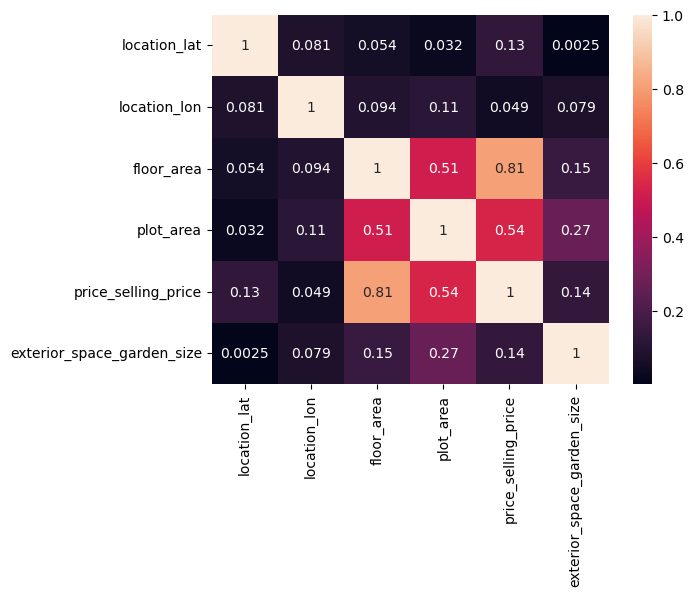

In [19]:
sns.heatmap(df_full_train[numerical].corr(), annot=True)

We see that our target variable feature `price_selling_price` correlates with `floor_area` and `plot_area`. They also seem to correlate to each other. Let's take a long at a pairplot:

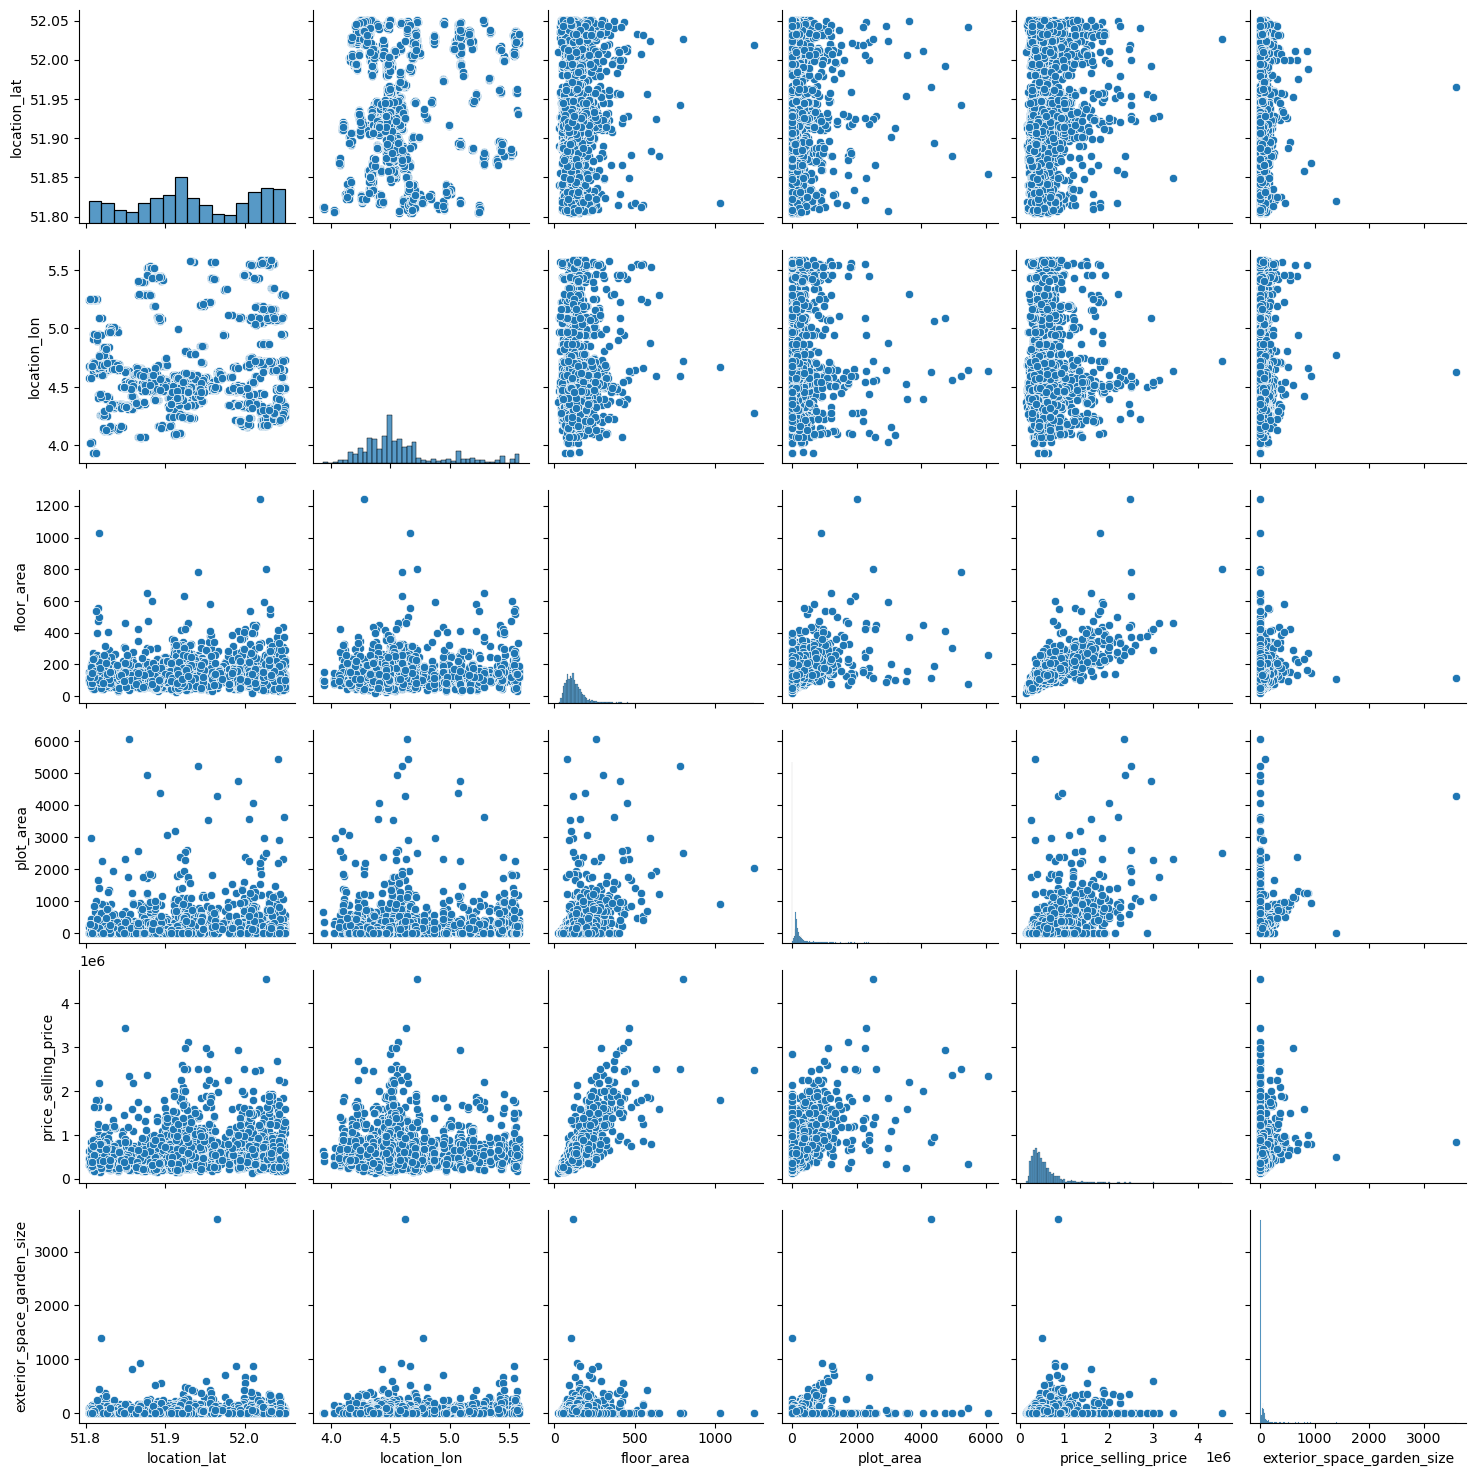

In [20]:
sns.pairplot(df_full_train[numerical])

## Categorical feature importance

## Distribution of the Target Variable

Let's take a closer look at the distribution of our target variable `price_selling_price`:

In [ ]:
sns.histplot(df_full_train.price_selling_price, bins=50)

`price_selling_price` has a long tail. We will try it with and without log transform to see if it improves our ML model later on. Same for the other features.

In [ ]:
df_full_train.iloc[1160].to_frame().head(30)

# Model Training

In [ ]:
from sklearn.feature_extraction import DictVectorizer

dicts_train = df_train.to_dict(orient="records")
dicts_val = df_val.to_dict(orient="records")
dv = DictVectorizer(sparse=False)
dv.fit(dicts_train)

X_train = dv.transform(dicts_train)
X_val = dv.transform(dicts_val)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

In [ ]:
from sklearn.metrics import root_mean_squared_error

rmse_train = root_mean_squared_error(np.expm1(y_train), np.expm1(y_pred_train))
rmse_val = root_mean_squared_error(np.expm1(y_val), np.expm1(y_pred_val))

print(rmse_train)
print(rmse_val)